In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import argparse

In [2]:
def sigmoid_activation(x):
    return 1.0/(1+np.exp(-x))

def d_sigmoid(x):
    return x*(1-x)

def predict(X, W):
    # Take the dot product between our features and weight matrix
    preds = sigmoid_activation(X.dot(W))
    
    # Apply a step function to threshold the outputs to binary class labels
    preds[preds <= 0.5] = 0
    preds[preds > 0] = 1
    
    return preds

In [3]:
# Hyperparameters
ALPHA = 0.001
EPOCHS = 100

In [4]:
# Generate a 2 class classification problem with 1000 data points 
# where each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=1000, n_features=2, centers=2, 
    cluster_std=1.5, random_state=1)
y = y.reshape((y.shape[0], 1))

In [5]:
print(X.shape)
X[:10]

(1000, 2)


array([[ -3.75777913,   4.5291416 ],
       [ -7.91575179,  -3.61404891],
       [  2.88672576,   5.64336681],
       [ -9.0099072 ,  -2.45499607],
       [-12.35882264,  -3.80245842],
       [-12.13500386,  -5.30851264],
       [-10.66892241,  -3.67047418],
       [-10.67019716,  -2.91431518],
       [ -0.09942618,   3.02882981],
       [-11.36787762,  -4.88920628]])

In [6]:
print(y.shape)
y[:10]

(1000, 1)


array([[0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1]])

In [7]:
# Insert a column matrix of 1s as the last entry in the feature matrix
# -- this little trick allows us to treat the bias as a trainable parameter
# within the weight matrix

X = np.c_[X, np.ones((X.shape[0]))]
print(X.shape)
X[:10]

(1000, 3)


array([[ -3.75777913,   4.5291416 ,   1.        ],
       [ -7.91575179,  -3.61404891,   1.        ],
       [  2.88672576,   5.64336681,   1.        ],
       [ -9.0099072 ,  -2.45499607,   1.        ],
       [-12.35882264,  -3.80245842,   1.        ],
       [-12.13500386,  -5.30851264,   1.        ],
       [-10.66892241,  -3.67047418,   1.        ],
       [-10.67019716,  -2.91431518,   1.        ],
       [ -0.09942618,   3.02882981,   1.        ],
       [-11.36787762,  -4.88920628,   1.        ]])

In [8]:
# Partition the data into training and testing splits using 50% of the
# data for training and the remaining 50% for testing

(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.5, random_state=42)

In [9]:
# Initialize our weight matix and list of losses
print("[INFO] training...")
W = np.random.randn(X.shape[1], 1)
losses = []

[INFO] training...


In [10]:
print(W.shape)
W[:10]

(3, 1)


array([[-1.08998284],
       [ 0.70546957],
       [ 1.62379005]])

In [11]:
# Loop over the epoch counts
for epoch in np.arange(0, EPOCHS):
    # Take the dot product between our features X and wthe weight W, pas this resultant value
    # through our sigmoid activation function, thereby giving us our predictions on the dataset
    preds = sigmoid_activation(trainX.dot(W))
    
    # Now that we have our predictions, we need to determine the 'error', which is the difference 
    # between our predictions and the true values
    error = preds - trainY
    loss = np.sum(error ** 2)
    losses.append(loss)
    
    # The gradient descent update is the dot product between our features and the 
    # error of the predictions
    gradient = trainX.T.dot(error)
    
    # In the update stage, all we need to do is nudge the weight matrix in the negative direction 
    # of the gradient (hence the term gradient descent by taking a small step towards a set of 
    # more optimal parameters)
    W += -ALPHA * gradient
    
    # Check to see if an update should be displayed
    if epoch == 0 or (epoch + 1) % 5 == 0:
        print("[INFO] epoch={}, loss={:.7f}".format(int(epoch + 1), loss))

[INFO] epoch=1, loss=245.5166630
[INFO] epoch=5, loss=5.4815231
[INFO] epoch=10, loss=2.8734767
[INFO] epoch=15, loss=2.0906553
[INFO] epoch=20, loss=1.7234326
[INFO] epoch=25, loss=1.5063401
[INFO] epoch=30, loss=1.3580117
[INFO] epoch=35, loss=1.2471762
[INFO] epoch=40, loss=1.1595451
[INFO] epoch=45, loss=1.0876096
[INFO] epoch=50, loss=1.0269757
[INFO] epoch=55, loss=0.9748550
[INFO] epoch=60, loss=0.9293669
[INFO] epoch=65, loss=0.8891822
[INFO] epoch=70, loss=0.8533262
[INFO] epoch=75, loss=0.8210631
[INFO] epoch=80, loss=0.7918242
[INFO] epoch=85, loss=0.7651608
[INFO] epoch=90, loss=0.7407135
[INFO] epoch=95, loss=0.7181899
[INFO] epoch=100, loss=0.6973490


In [12]:
print("[INFO] Evaluating...")
preds = predict(testX, W)
print(classification_report(testY, preds))

[INFO] Evaluating...
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       250
          1       1.00      1.00      1.00       250

avg / total       1.00      1.00      1.00       500



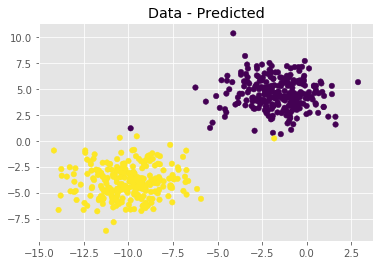

In [13]:
plt.style.use("ggplot")
plt.figure()
plt.title("Data - Predicted")
plt.scatter(testX[:, 0], testX[:, 1], marker="o", c=preds.flatten(), s=30)



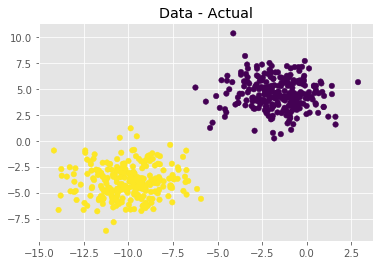

In [14]:
plt.title("Data - Actual")
plt.scatter(testX[:, 0], testX[:, 1], marker="o", c=testY.flatten(), s=30)

In [15]:
testY[:10]

array([[1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1]])

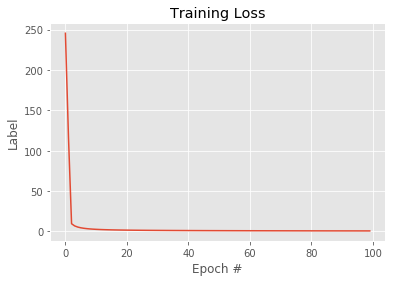

In [16]:
# Construct a figure that plots the loss over time
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, EPOCHS), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Label")
plt.show()